In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y-dataset')

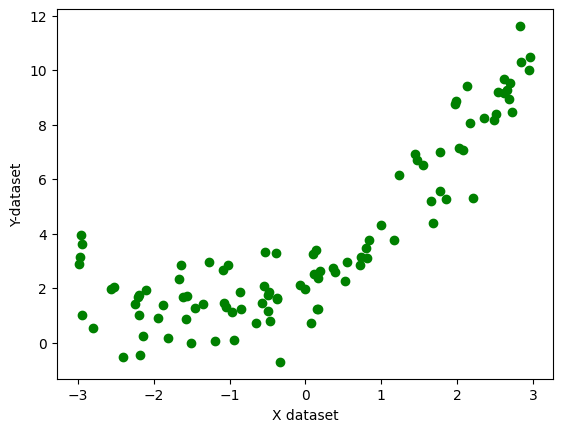

In [13]:
X=6* np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y-dataset')

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
##Let's implement a simple linear regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [16]:
regression_1.fit(X_train, y_train)

LinearRegression()

In [17]:
from sklearn.metrics import r2_score
score=r2_score(y_test, regression_1.predict(X_test))
print(score)

0.5851750103464569


Text(0, 0.5, 'Y Dataset')

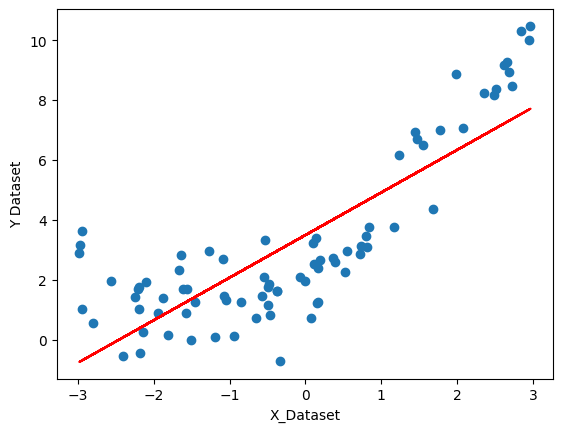

In [18]:
plt.plot(X_train, regression_1.predict(X_train),color='r')
plt.scatter(X_train, y_train)
plt.xlabel("X_Dataset")
plt.ylabel("Y Dataset")

In [19]:
##Let's apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [21]:
X_train_poly

array([[ 1.00000000e+00, -2.14071520e+00,  4.58266156e+00],
       [ 1.00000000e+00, -1.56893790e+00,  2.46156613e+00],
       [ 1.00000000e+00,  1.68243351e+00,  2.83058251e+00],
       [ 1.00000000e+00,  2.50889816e+00,  6.29456997e+00],
       [ 1.00000000e+00,  1.93190098e-01,  3.73224139e-02],
       [ 1.00000000e+00,  3.63489749e-01,  1.32124798e-01],
       [ 1.00000000e+00,  8.11073149e-01,  6.57839654e-01],
       [ 1.00000000e+00,  2.61870749e+00,  6.85762891e+00],
       [ 1.00000000e+00, -2.10823992e+00,  4.44467555e+00],
       [ 1.00000000e+00,  1.09333113e-01,  1.19537296e-02],
       [ 1.00000000e+00,  2.72087569e+00,  7.40316453e+00],
       [ 1.00000000e+00, -2.94566704e+00,  8.67695433e+00],
       [ 1.00000000e+00, -1.88048049e+00,  3.53620687e+00],
       [ 1.00000000e+00, -1.61176649e+00,  2.59779121e+00],
       [ 1.00000000e+00, -9.41585133e-01,  8.86582564e-01],
       [ 1.00000000e+00, -2.19542719e+00,  4.81990055e+00],
       [ 1.00000000e+00, -8.56710364e-01

In [22]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8534185989358016


In [23]:
print(regression.coef_)

[[0.         1.42611537 0.4742422 ]]


In [24]:
print(regression.intercept_)

[2.14331921]


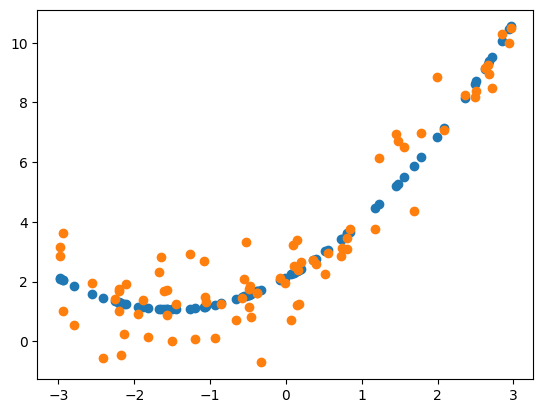

In [25]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [27]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

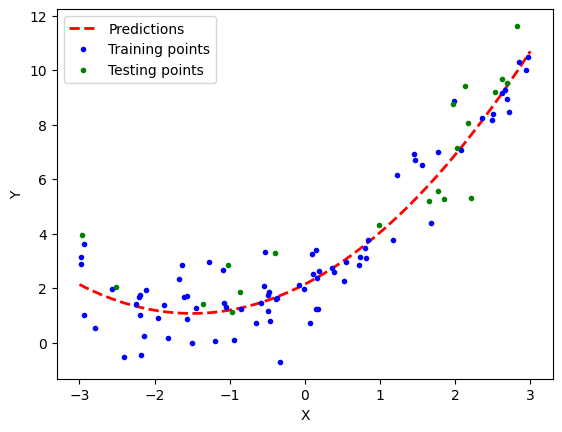

In [30]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r--", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.", label='Testing points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()